In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import h5py
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [41]:
quadra_root = "../../data/ACDC/quadra/"
# quadra_root = "."

In [42]:
quadra_data = h5py.File(os.path.join(quadra_root, "acdc_quadra.h5"), "r")
quadra_meta = pd.read_csv(os.path.join(quadra_root, "quadra_per_slice_train.csv"))

In [43]:
sample = quadra_meta.iloc[3]

In [44]:
df = quadra_meta
sample = df[ 
    (df['Patient'] == 10) &
    (df['Phase'] == "ed")
]

In [54]:
for c, d in df.groupby("Group"):
    print(d.iloc[0])

ID                              0
Patient                         1
Phase                          ed
Group                         DCM
NbFrame                        30
FrameIdx                        1
NbSlice                        10
SliceIdx                        0
Height                      184.0
Weight                       95.0
H5path      quadra_per_slice/0000
Name: 0, dtype: object
ID                            390
Patient                        21
Phase                          ed
Group                         HCM
NbFrame                        30
FrameIdx                        1
NbSlice                        10
SliceIdx                        0
Height                      192.0
Weight                      110.0
H5path      quadra_per_slice/0390
Name: 390, dtype: object
ID                            768
Patient                        41
Phase                          ed
Group                        MINF
NbFrame                        17
FrameIdx                        1


In [49]:
df.NbSlice.max()
df.NbSlice.min()

6

Text(0.5, 0.98, '10, ed, slice1~9')

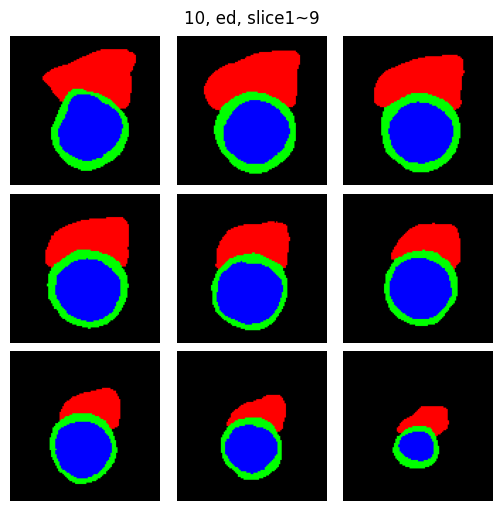

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(5,5), constrained_layout=True)
axsf = axs.flatten()
for i in range(9):
    ax = axsf[i]
    h5path = sample.iloc[i].H5path
    slice = quadra_data[h5path][:]
    ax.imshow(slice[..., 1:])
    ax.set_axis_off()
fig.suptitle(f"{sample.Patient.values[0]}, {sample.Phase.values[0]}, ")

# fig.savefig(f"../../tmp/{n}.png", dpi=300)
# n += 1


In [2]:
"patient001" < "patient002"

True

In [8]:
sample = df[
    (df['Group'] == 'DCM') & 
    (df['Patient'] == 'patient001') &
    (df['Phase'] == "ed") &
    (df["SliceIdx"] == 1)
]
slice = quadra_data[sample.H5path.values[0]]

Text(0.5, 0.98, 'patient001, ed, slice 1')

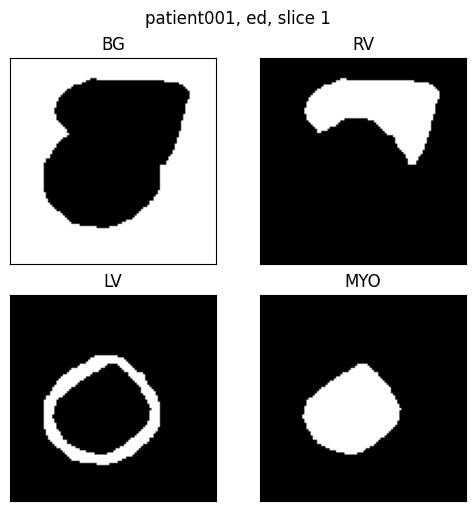

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(5,5), constrained_layout=True)
axsf = axs.flatten()
labels = ["BG", "RV", "LV", "MYO"]
for i in range(4):
    ax = axsf[i]
    ax.imshow(slice[..., i], cmap="gray", vmin=0, vmax=1)
    ax.set_title(labels[i])
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.suptitle(f"{sample.Patient.values[0]}, {sample.Phase.values[0]}, slice 1")

---
---